# DSE 312: Computer Vision

## Coding Assignment

### Answer 1:

#### SIFT algorithm mainly involves the following steps:
    -> Scale-space peak selection: Potential location for finding features.
    -> Keypoint Localization: Accurately locating the feature keypoints.
    -> Orientation Assignment: Assigning orientation to keypoints.
    -> Keypoint descriptor: Describing the keypoints as a high dimensional vector.
    -> Keypoint Matching
    
**Scale_Space_peak_Selction:**
   - for an image, produce a scale space using Convolution of Gaussian kernel(Blurring) at different scales with the input image.
   - Scale-space is separated into octaves and the number of octaves and scale depends on the size of the original image.
   - Within the octave of an image IMG:
      * images are progressively blurred using the Gaussian Blur operator.
      * Compute DoG of each image which are equivalent to Laplacian of Gaussian.

**KeyPoint Localization:**
   - For low contrast features, check their intensities.
   - If the intensity at this extrema is less than a threshold value, it is rejected
   - DoG has a higher response for edges, so edges are not removed.
   - From Hessiam matrix H: Compute Principal Curvature Using Hessian Matrix.

**Orientation Assignment:** - to assign an orientation to each keypoint to make it rotation invariant
   - Take neighborhood around the keypoint location depending upon the scale
   - Calculate Gradient magnitute and Direction in that neighborhood.
   - Create orientation histogram with 36 bins covering 360 degress.
   - Take highest peak in the histogram i.e above 80% and calculate the orientation(keypoints with same location and scale, but      of different directions is created)

**Keypoint descriptor:**
   - Take 16x16 window around the keypoint and divide it into 16 sub_blocks of 4x4 size.
   - For each sub_block, create 8 bin orientation histogram
   - Rotate the image and subtract the keypoint Orientation from each orientation.
   - Threshold the number that are big to achieve the illumination independence.
   - Normalize the feature Vector.
   
**Keypoint Mathing:**
   - Identify the nearest neighbors between two images and match them.
   - For case:
       * if second closest match is very near to the first:
        - calculate ratio of closest-distance to second-closest distance
        - if ratio > 0.8:
             * reject the images

### Answer 2

##### Implementing Viola Jones Algorithm

In [40]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

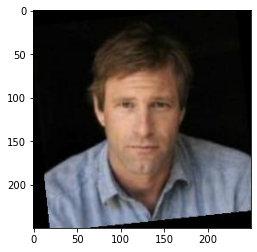

In [41]:
original_image = cv2.imread("Aaron_Eckhart_0001.jpg")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

In [42]:
original_image.shape

(250, 250, 3)

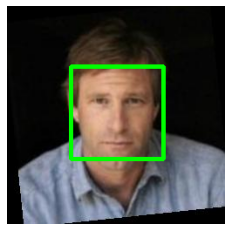

In [44]:
# Converting the image to graysacle and applying pre trained cascade classifier to detect face
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# Using haarcascade for face detection
face_cascade = cv2.CascadeClassifier(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\opencv\haarcascades\haarcascade_frontalface_default.xml") 
detected_faces = face_cascade.detectMultiScale(gray)
# Iterating over rectangles to detect face
for (column, row, width, height) in detected_faces:
    cv2.rectangle(original_image,(column, row),(column + width, row + height),(0, 255, 0),4)    
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

#### Steps of Viola Jones Algorithm

1. The basic classifier operates on 24 x 24 subwindows
2. Scaling:
- Scale the detector 
- Features can easily be evaluated at any scale
3. Location:
- Move detector around the image 
4. Final Detections
- A real face may result in multiple nearby detections
- Post-process detected sub-windows to combine overlapping detections into a single detection

### Answer 3

In [2]:
img = cv2.imread("tounching_grayscale.png",0) # Reading the image in grayscale

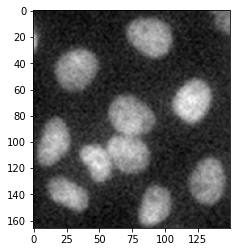

In [3]:
plt.imshow(img, cmap = 'gray')

In [4]:
img.max()

124

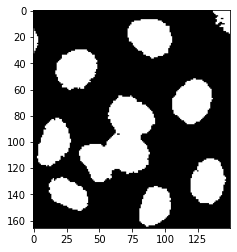

In [5]:
# Converting grayscale to binary image using thresholding
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap = 'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2745891f6a0>)

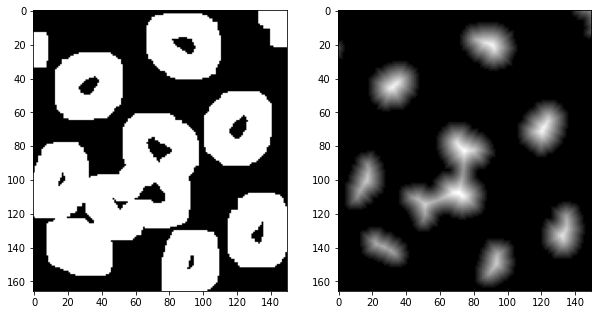

In [6]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=5)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(unknown, cmap = 'gray')
plt.subplot(122),plt.imshow(dist_transform, cmap = 'gray')

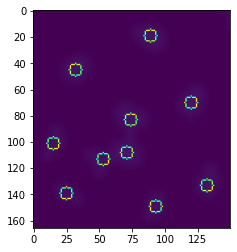

In [7]:
# Separating clusters using KMeans Clustering
from sklearn.cluster import KMeans
from skimage.feature import peak_local_max
local_max_location = peak_local_max(dist_transform, min_distance=1)
kmeans = KMeans(n_clusters=10)
kmeans.fit(local_max_location)
local_max_location = kmeans.cluster_centers_.copy()
local_max_location = local_max_location.astype(int)
local_max_location.shape
dist_transform_copy = dist_transform.copy()
for i in range(local_max_location.shape[0]):
    cv2.circle( dist_transform_copy, (local_max_location[i][1],local_max_location[i][0]), 5, 255 )
plt.imshow(dist_transform_copy)

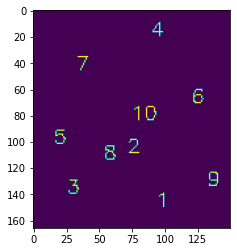

In [8]:
# Labeling the separated clusters with numbers
markers = np.zeros_like(dist_transform)
labels = np.arange(kmeans.n_clusters)
markers[local_max_location[:,0],local_max_location[:,1]] = labels + 1
markers = markers.astype(int)
markers_copy = markers.copy()
index_non_zero_markers = np.argwhere(markers != 0)
markers_copy = markers_copy.astype(np.uint8)
index_non_zero_markers
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(index_non_zero_markers.shape[0]):
    string_text = str(markers[index_non_zero_markers[i][0] ,index_non_zero_markers[i][1] ])
    cv2.putText( markers_copy, string_text, (index_non_zero_markers[i][1], index_non_zero_markers[i][0]), font, 0.5, 255)
plt.imshow(markers_copy)

### Answer 4

In [125]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

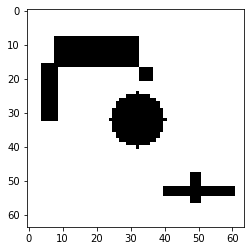

In [126]:
img = cv2.imread('shapes.png', 2)
  
ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
  
# converting to its binary form
bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
  
plt.imshow(bw_img, cmap='binary')

In [127]:
bw_img.max()

255

In [128]:
bw_img.dtype

dtype('uint8')

In [129]:
# Finding contours and printing them
contours, hierarchy = cv2.findContours(bw_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],-1,(0,0,255),1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [130]:
print(contours)

(array([[[48, 48]],

       [[48, 51]],

       [[47, 52]],

       [[40, 52]],

       [[40, 54]],

       [[47, 54]],

       [[48, 55]],

       [[48, 56]],

       [[50, 56]],

       [[50, 55]],

       [[51, 54]],

       [[60, 54]],

       [[60, 52]],

       [[51, 52]],

       [[50, 51]],

       [[50, 48]]], dtype=int32), array([[[32, 24]],

       [[31, 25]],

       [[29, 25]],

       [[28, 26]],

       [[27, 26]],

       [[26, 27]],

       [[26, 28]],

       [[25, 29]],

       [[25, 31]],

       [[24, 32]],

       [[25, 33]],

       [[25, 35]],

       [[26, 36]],

       [[26, 37]],

       [[27, 38]],

       [[28, 38]],

       [[29, 39]],

       [[31, 39]],

       [[32, 40]],

       [[33, 39]],

       [[35, 39]],

       [[36, 38]],

       [[37, 38]],

       [[38, 37]],

       [[38, 36]],

       [[39, 35]],

       [[39, 33]],

       [[40, 32]],

       [[39, 31]],

       [[39, 29]],

       [[38, 28]],

       [[38, 27]],

       [[37, 26]],

     

In [131]:
from skimage.measure import find_contours

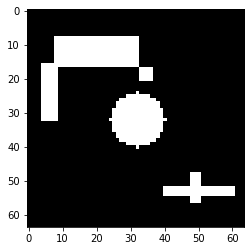

In [132]:
contours = find_contours(bw_img, 0.8)

fig, ax = plt.subplots()
ax.imshow(bw_img, interpolation='nearest', cmap=plt.cm.gray)


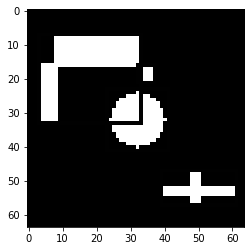

In [133]:
from skimage.draw import polygon, polygon_perimeter
import numpy as np

bounding_boxes = []

for contour in contours:
    Xmin = np.min(contour[:,0])
    Xmax = np.max(contour[:,0])
    Ymin = np.min(contour[:,1])
    Ymax = np.max(contour[:,1])
    
    bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])
    

with_boxes  = np.copy(bw_img)

for box in bounding_boxes:
    #[Xmin, Xmax, Ymin, Ymax]
    r = [box[0],box[1],box[1],box[0], box[0]]
    c = [box[3],box[3],box[2],box[2], box[3]]
    rr, cc = polygon_perimeter(r, c, with_boxes.shape)
    with_boxes[rr, cc] = 1 #set color white

plt.imshow(with_boxes, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

In [134]:
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

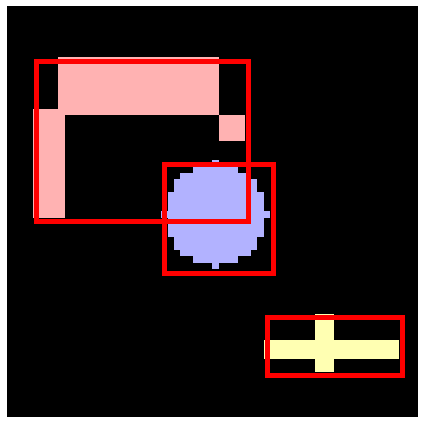

In [135]:
# label image regions
label_image = label(bw_img)
# to make the background transparent, pass the value of `bg_label`, and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=bw_img, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 50:
        # drawing bounding box rectangle for 8-connected components
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=5)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

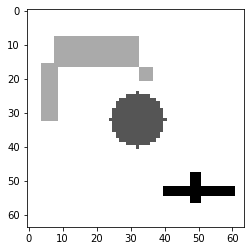

In [136]:
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd
label_img = label(bw_img)
regions = regionprops(label_img)
plt.imshow(label_img, cmap='binary')

In [138]:
# Using regionprops table to find eccentricity
pd.DataFrame(regionprops_table(label_img, img, properties = ['eccentricity', 'bbox']))

,eccentricity,bbox-0,bbox-1,bbox-2,bbox-3
0,0.866945,8,4,33,37
1,0.000000,24,24,41,41
2,0.948645,48,40,57,61


### Answer 5

#### Finding ORB descriptors, Harris Corners on two different views of same monument

ORB Descriptors
- Run each test against all training patches.
- Order the tests by their distance from a mean of 0.5, forming the vector T.
- Greedy search:
    * Put the first test into the result vector R and remove it from T.
    * Take the next test from T, and compare it against all tests in R. If its absolute correlation is greater than a        threshold, discard it; else add it to R.
    * Repeat the previous step until there are 256 tests in R. If there are fewer than 256, raise the threshold and try again

In [ ]:
img = cv2.imread('1.jpg',0)
# Initiating ORB detector
orb = cv2.ORB_create()
# finding the keypoints with ORB
kp = orb.detect(img,None)
# computing the descriptors with ORB
kp, des = orb.compute(img, kp)
# drawing the keypoints location
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

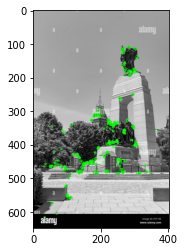

(<matplotlib.image.AxesImage at 0x217852f6160>, None)

In [59]:
img = cv2.imread('3.jpg',0)
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

##### Harris Corner Detection
- Take the grayscale of the original image
- Apply a Gaussian filter to smooth out any noise
- Apply Sobel operator to find the x and y gradient values for every pixel in the grayscale image
- For each pixel p in the grayscale image, consider a 3×3 window around it and compute the corner strength function. Call this its Harris value.
- Find all pixels that exceed a certain threshold and are the local maxima within a certain window

In [51]:
from skimage.io import imread
from skimage.color import rgb2gray

img = imread('1.jpg')
imggray = rgb2gray(img)

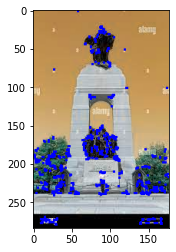

In [52]:
image = cv2.imread('1.jpg')
 
# converting the input image to grayscale
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# modifying the data type setting to 32-bit floating point
operatedImage = np.float32(operatedImage)
 
# apply the cv2.cornerHarris method to detect the corners with appropriate values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
 
# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)
 
# Reverting back to the original image, with optimal threshold value
image[dest > 0.01 * dest.max()]=[0, 0, 255]

plt.imshow(image)

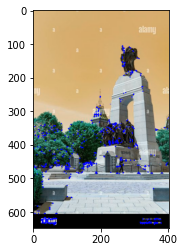

In [58]:
image = cv2.imread('3.jpg')
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
operatedImage = np.float32(operatedImage)

dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)

dest = cv2.dilate(dest, None)

image[dest > 0.01 * dest.max()]=[0, 0, 255]
plt.imshow(image)

In [60]:
import cv2
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform, AffineTransform
import numpy as np

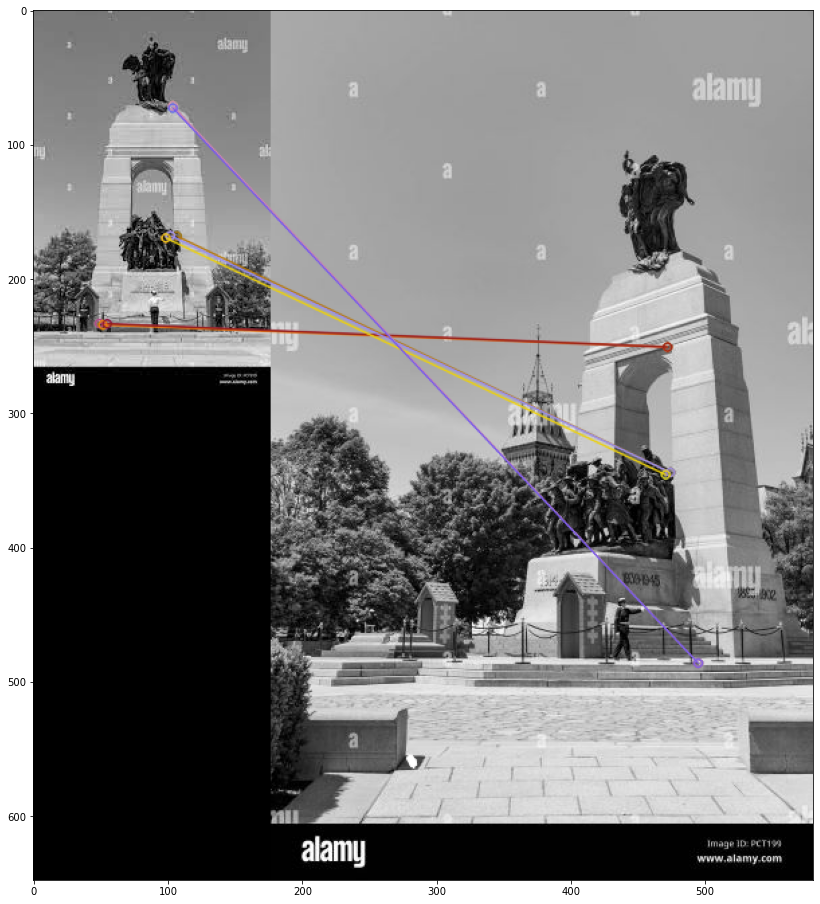

In [72]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
des1 = np.float32(des1)
des2 = np.float32(des2)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)


good = []
for m, n in matches:
    if m.distance < 0.9*n.distance:
        good.append(m)

src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1, 2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1, 2)

# Ransac
model, inliers = ransac(
        (src_pts, dst_pts),
        AffineTransform, min_samples=4,
        residual_threshold=8, max_trials=10000
    )

n_inliers = np.sum(inliers)

inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in src_pts[inliers]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in dst_pts[inliers]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
image3 = cv2.drawMatches(img1, inlier_keypoints_left, img2, inlier_keypoints_right, placeholder_matches, None)


plt.figure(figsize=(16,16))
plt.imshow(image3)



In [73]:
img2.shape

(648, 404)

In [74]:
img1.shape

(284, 177)

In [65]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('1.jpg',0)         
img2 = cv2.imread('3.jpg',0) 
# Initiating SIFT detector
sift = cv2.SIFT_create()
# finding the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2, k=2)
# storing all the good matches 
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append(m)

In [66]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

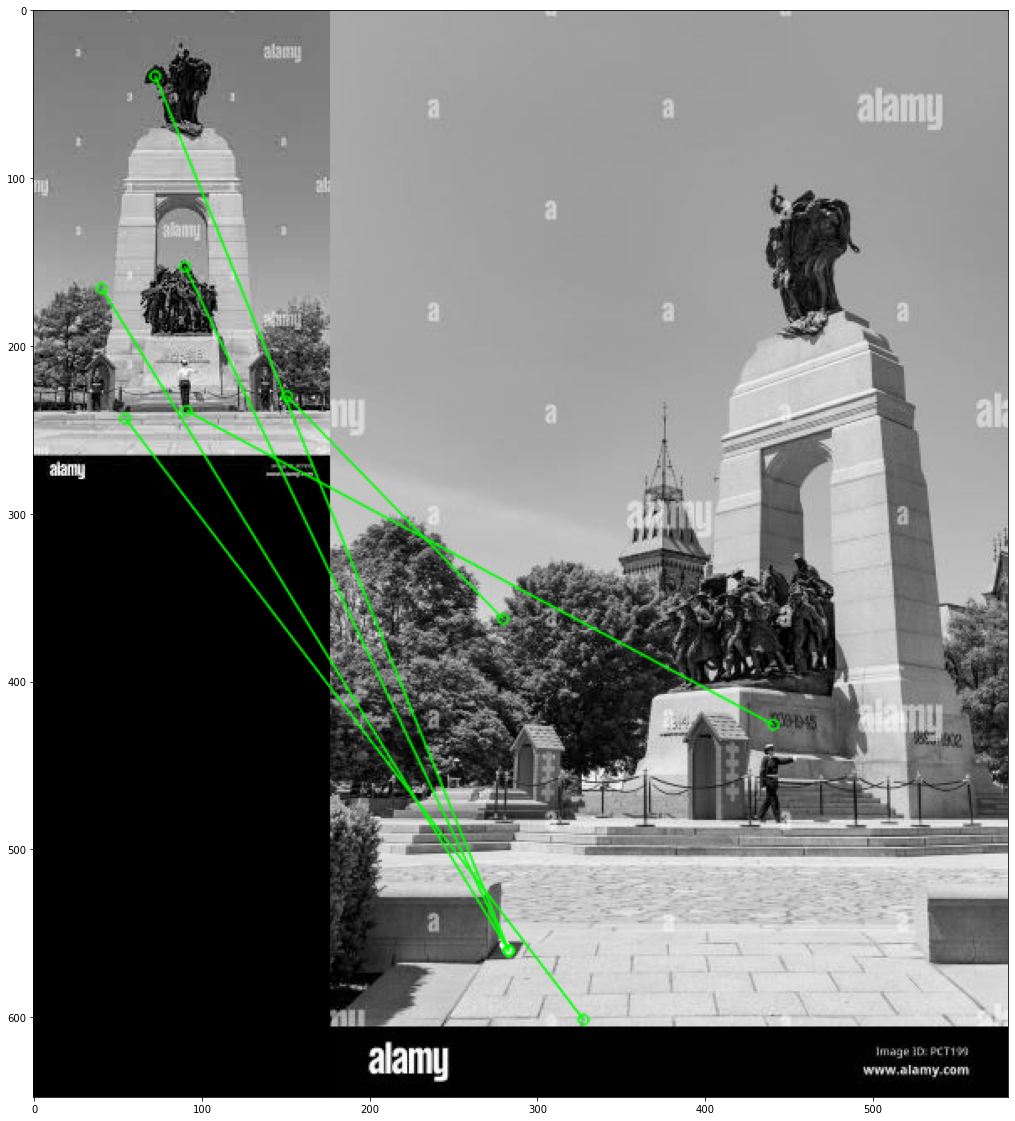

(<matplotlib.image.AxesImage at 0x2178538b8b0>, None)

In [67]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize=(20,20))
plt.imshow(img3, 'gray'),plt.show()

Observation regarding keypoint descriptors
- All repetitive structures have the same keypont descriptors and they uniquely identify that area.
- These are usually scale and rotation invariant.
- As these are scale and rotation invariant, keypoint descriptors are useful in finding similarities between to images, 
  e.g. stitching two images having a common segment (making panorma), face alignment, 3d shape, estimation.


### Answer 6

In [166]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

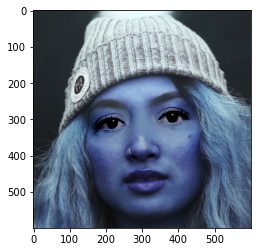

In [167]:
#importing required libraries
import cv2

#reading the image
img = cv2.imread(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\real_fake_face\real_and_fake_face\training_fake\easy_3_1100.jpg")
plt.imshow(img)

(512, 512, 3)


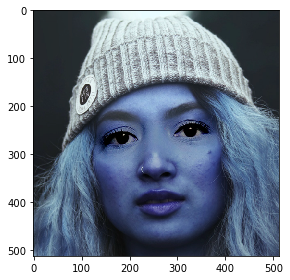

In [17]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
resized_img = resize(img, (512,512)) 
imshow(resized_img) 
print(resized_img.shape)
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(32, 32), 
                cells_per_block=(2, 2), visualize=True, multichannel=True)


In [18]:
import os
training_images_fake = os.listdir(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\real_fake_face\real_and_fake_face\training_fake")
len(training_images_fake)

960

In [19]:
fake_df = pd.DataFrame()
j = 0
for i in training_images_fake:    
    img = imread(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\real_fake_face\real_and_fake_face\training_fake\\"+i)
    resized_img = resize(img, (512,512))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(32, 32), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    j = j+1
    print(fd,len(fd), " ", j)
    fds = pd.Series(fd)
    fake_df = fake_df.append(fds,ignore_index=True)

[0.23064758 0.14188266 0.07638114 ... 0.07210655 0.09161019 0.16106882] 8100   1


<ipython-input-19-7c2bacafd8b0>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fake_df = fake_df.append(fds,ignore_index=True)


[0.20645197 0.00597431 0.         ... 0.01823679 0.00145199 0.        ] 8100   2


<ipython-input-19-7c2bacafd8b0>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fake_df = fake_df.append(fds,ignore_index=True)


[0.22137446 0.13618054 0.08939701 ... 0.27610605 0.27610605 0.27610605] 8100   3
[0.11785232 0.08853697 0.13941644 ... 0.2452439  0.2452439  0.21561534] 8100   4
[0.         0.         0.         ... 0.05455318 0.0754503  0.16363991] 8100   5
[0.23150692 0.12234755 0.09948248 ... 0.09446361 0.25225032 0.25225032] 8100   6
[0.08804443 0.04114066 0.04390315 ... 0.1711685  0.18963399 0.20976485] 8100   7
[0.33344927 0.0777234  0.01921327 ... 0.28456747 0.27312261 0.0594108 ] 8100   8
[0.04061231 0.0492671  0.08320507 ... 0.02338162 0.0474115  0.05513037] 8100   9
[0.11522845 0.13614613 0.1376332  ... 0.16550554 0.12853733 0.08941924] 8100   10
[0.15831026 0.13084903 0.23045576 ... 0.07157446 0.04417312 0.04351123] 8100   11
[0. 0. 0. ... 0. 0. 0.] 8100   12
[0.23661743 0.09733405 0.07301463 ... 0.03508091 0.33423321 0.33423321] 8100   13
[0.         0.         0.         ... 0.06949648 0.08007244 0.14444272] 8100   14
[0.21445758 0.11319508 0.18781545 ... 0.06425801 0.06871689 0.19574335]

[0.00856743 0.01778876 0.04163215 ... 0.08987492 0.12376801 0.13527086] 8100   104
[0.10349197 0.0251513  0.03125118 ... 0.20635558 0.21426052 0.15659374] 8100   105
[0.18969091 0.15210382 0.11341282 ... 0.09331848 0.09214423 0.1080812 ] 8100   106
[0.05311381 0.03781768 0.05970589 ... 0.11043641 0.15292561 0.1590301 ] 8100   107
[0.         0.         0.         ... 0.18959955 0.17602207 0.17397011] 8100   108
[0.21147899 0.14387642 0.15169443 ... 0.14616521 0.1964682  0.18988021] 8100   109
[0.16377577 0.14905802 0.15117443 ... 0.14494986 0.12822102 0.11109173] 8100   110
[0.24718023 0.24631515 0.17601094 ... 0.1405309  0.12567707 0.09140092] 8100   111
[0.18329701 0.17994382 0.24636806 ... 0.13135197 0.12851835 0.1500706 ] 8100   112
[0.2773623  0.19539166 0.11950031 ... 0.01219886 0.00849507 0.00891378] 8100   113
[0.24561152 0.28595181 0.28595181 ... 0.06366383 0.28056789 0.29683264] 8100   114
[0.1665544  0.0639301  0.04895563 ... 0.06485698 0.15417053 0.24129125] 8100   115
[0.1

[0.07567528 0.11229147 0.28203376 ... 0.16610951 0.21783331 0.1411152 ] 8100   203
[0.10086198 0.10112192 0.09358988 ... 0.04957496 0.05359818 0.07901791] 8100   204
[0.30567482 0.1523505  0.27933752 ... 0.041097   0.06107599 0.04485067] 8100   205
[0.18031321 0.1017989  0.11411334 ... 0.18047579 0.16645612 0.12225439] 8100   206
[0.17579553 0.08188251 0.03259028 ... 0.16081455 0.22676703 0.22676703] 8100   207
[0.19963741 0.0779456  0.12075142 ... 0.01472385 0.02140401 0.05140454] 8100   208
[0.17827373 0.1520995  0.18058047 ... 0.09272442 0.1213474  0.22847648] 8100   209
[0.15352151 0.15850742 0.18879575 ... 0.05260614 0.1378715  0.29289539] 8100   210
[0.25076535 0.25076535 0.15993111 ... 0.14180021 0.20529639 0.17830826] 8100   211
[0.05589988 0.05747551 0.10586164 ... 0.20116557 0.19248009 0.20034264] 8100   212
[0.26801493 0.29440073 0.18349775 ... 0.22774477 0.23533487 0.15923493] 8100   213
[0.01498082 0.01216795 0.03576181 ... 0.12946311 0.19087173 0.20710493] 8100   214
[0.2

[0.12875373 0.12136836 0.13346856 ... 0.11050819 0.06723383 0.05803498] 8100   302
[0.24097768 0.19194811 0.17708561 ... 0.09240046 0.23295172 0.29320242] 8100   303
[0.18747796 0.15850638 0.16339196 ... 0.19598009 0.17603086 0.22962991] 8100   304
[0.24969031 0.16227739 0.13319975 ... 0.14804221 0.11662507 0.16293748] 8100   305
[0.09915301 0.07184958 0.15059498 ... 0.0138597  0.00803259 0.00727244] 8100   306
[0.20988211 0.21604633 0.21334399 ... 0.09904437 0.1848696  0.23834597] 8100   307
[0.18803059 0.14736026 0.11643255 ... 0.33934221 0.06706049 0.03868036] 8100   308
[0.06458508 0.         0.         ... 0.05027327 0.12296004 0.29989361] 8100   309
[0.22756773 0.19388841 0.08927974 ... 0.11147638 0.11049619 0.1393318 ] 8100   310
[0.24778211 0.08544531 0.06606408 ... 0.23951124 0.23951124 0.20429393] 8100   311
[0.22460467 0.22460467 0.22460467 ... 0.29917651 0.29917651 0.15887761] 8100   312
[0.29493498 0.12442275 0.04686663 ... 0.26543092 0.05309035 0.03159254] 8100   313
[0.1

[0.20222232 0.0503415  0.07596817 ... 0.08189471 0.02985288 0.03439784] 8100   400
[0.28157041 0.25951633 0.12355247 ... 0.05110803 0.09345488 0.12358446] 8100   401
[0.         0.         0.         ... 0.14373846 0.0310296  0.01546352] 8100   402
[0.21059957 0.13276877 0.13243617 ... 0.11224735 0.3584407  0.3584407 ] 8100   403
[0.02292147 0.04747867 0.19908214 ... 0.10122498 0.02450361 0.02526995] 8100   404
[0.22402447 0.16586224 0.17575554 ... 0.215423   0.18239377 0.18676486] 8100   405
[0.26419275 0.18322589 0.14133039 ... 0.21387132 0.12998379 0.13938745] 8100   406
[0.05996576 0.02854819 0.06987957 ... 0.2502205  0.17751471 0.25214763] 8100   407
[0.15607161 0.12210877 0.11394143 ... 0.03517322 0.0785183  0.11441075] 8100   408
[0.020917   0.04417861 0.19954958 ... 0.20673062 0.11948329 0.0467582 ] 8100   409
[0.16081343 0.06892017 0.122917   ... 0.08508667 0.05702175 0.09021913] 8100   410
[0.04086734 0.04209576 0.13495896 ... 0.0674742  0.18542885 0.28008884] 8100   411
[0.1

[0.15784604 0.14048131 0.14950712 ... 0.01950517 0.05733495 0.31192475] 8100   500
[0.18733821 0.18530221 0.17842831 ... 0.22300513 0.30724032 0.30724032] 8100   501
[0.2975421  0.2975421  0.2975421  ... 0.12058771 0.25618529 0.25618529] 8100   502
[0.14007631 0.1522844  0.11975978 ... 0.06606072 0.04037529 0.0369592 ] 8100   503
[0.13525976 0.16534134 0.21013337 ... 0.10535036 0.08717578 0.04480444] 8100   504
[0.18518601 0.13106363 0.13477911 ... 0.15438648 0.25716627 0.25716627] 8100   505
[0. 0. 0. ... 0. 0. 0.] 8100   506
[0.21398302 0.19320449 0.21277437 ... 0.03558025 0.04620342 0.12356156] 8100   507
[0.2003591  0.16714517 0.15542324 ... 0.4580275  0.05799941 0.02834433] 8100   508
[0.1255303  0.07519586 0.06753483 ... 0.2847278  0.2847278  0.2847278 ] 8100   509
[0.21575362 0.11951183 0.07478237 ... 0.13054884 0.15203354 0.24023228] 8100   510
[0.19522727 0.12337603 0.1312882  ... 0.10163723 0.10331402 0.18439429] 8100   511
[0.08236742 0.04196776 0.04522988 ... 0.09271294 0.1

 6.75371303e-02 7.65437670e-02] 8100   600
[0.09493288 0.14611229 0.28510909 ... 0.15372763 0.15152994 0.15601497] 8100   601
[0.40645869 0.06339563 0.01361777 ... 0.27505891 0.27505891 0.11295096] 8100   602
[0.22052154 0.22052154 0.22052154 ... 0.0986491  0.09552468 0.09310777] 8100   603
[3.79047687e-01 1.87726334e-02 2.95741846e-14 ... 2.94730143e-02
 5.19535462e-02 1.18242976e-01] 8100   604
[0.22706737 0.12960736 0.11992414 ... 0.07573886 0.15724255 0.22606877] 8100   605
[0.15688671 0.14218006 0.16908963 ... 0.27273699 0.27273699 0.11529841] 8100   606
[0.07609765 0.06727938 0.03769301 ... 0.09311819 0.17817463 0.23451278] 8100   607
[0.14758991 0.12536743 0.11828722 ... 0.13355078 0.21713007 0.25290664] 8100   608
[0.28929286 0.04125191 0.04641023 ... 0.15204435 0.05702825 0.04257951] 8100   609
[0.26093407 0.10200369 0.07521919 ... 0.19780798 0.24598083 0.24598083] 8100   610
[0.22643302 0.17795141 0.14798145 ... 0.12558138 0.04391442 0.05415611] 8100   611
[0.17962352 0.12166

[0.17185885 0.19210532 0.10708717 ... 0.05041744 0.03526571 0.03125395] 8100   699
[0.23549773 0.11675155 0.0929529  ... 0.13147623 0.15621011 0.13463304] 8100   700
[0.11157146 0.03553983 0.02505373 ... 0.         0.         0.        ] 8100   701
[0.20133372 0.19170162 0.18426516 ... 0.0565763  0.09651192 0.12464527] 8100   702
[0.28768463 0.0968302  0.07483934 ... 0.37095064 0.31359017 0.08035592] 8100   703
[0.21190062 0.20261014 0.21190062 ... 0.17351453 0.21718613 0.16133812] 8100   704
[0.20265123 0.20265123 0.20265123 ... 0.19999705 0.16286387 0.16398302] 8100   705
[0.07688652 0.01835451 0.04292392 ... 0.02189929 0.0189473  0.11029751] 8100   706
[0.         0.         0.         ... 0.08383938 0.09647504 0.10753853] 8100   707
[0.34644062 0.01426822 0.01285747 ... 0.0992511  0.15708506 0.28470963] 8100   708
[0.23169694 0.18132563 0.15315767 ... 0.273589   0.16208251 0.112595  ] 8100   709
[0.22280616 0.22698224 0.22698224 ... 0.08643386 0.10892602 0.06530832] 8100   710
[0.0

[0.15423086 0.20850265 0.21962118 ... 0.0288072  0.06149592 0.3563773 ] 8100   798
[0.17613678 0.10033637 0.10876083 ... 0.14403207 0.17658519 0.21925925] 8100   799
[0.061702   0.01244598 0.01067327 ... 0.18447828 0.15329066 0.14252981] 8100   800
[0.23312104 0.23312104 0.23312104 ... 0.31642596 0.31642596 0.06832099] 8100   801
[0.18435473 0.1301166  0.10548677 ... 0.08141889 0.11123096 0.10595496] 8100   802
[0.20021499 0.13661446 0.13592984 ... 0.14598778 0.14052668 0.14169101] 8100   803
[0.18071917 0.09244258 0.12845329 ... 0.27370418 0.27370418 0.10730913] 8100   804
[0.24787592 0.18859837 0.23122854 ... 0.26036729 0.26036729 0.26036729] 8100   805
[0.14261774 0.07189485 0.06382877 ... 0.01681167 0.02227139 0.04426726] 8100   806
[0.0973576  0.01349075 0.01343987 ... 0.10354908 0.1080473  0.08471343] 8100   807
[0.20583044 0.12236297 0.15614134 ... 0.2335004  0.24981802 0.19379512] 8100   808
[0.26061361 0.22451661 0.26061361 ... 0.2325485  0.13758981 0.11104682] 8100   809
[0.0

[0.06671071 0.05393402 0.05348299 ... 0.09272814 0.07253567 0.06874346] 8100   897
[0.2972809  0.114944   0.07354541 ... 0.4083711  0.24686608 0.04179081] 8100   898
[0.23867912 0.23597283 0.15460064 ... 0.27642049 0.27642049 0.21595078] 8100   899
[0.22302451 0.19049983 0.16730055 ... 0.06950971 0.06883179 0.10109297] 8100   900
[0.20761539 0.14291197 0.1406793  ... 0.0900261  0.07399244 0.04299722] 8100   901
[0.03576564 0.01373986 0.0256932  ... 0.08262278 0.04387598 0.03363191] 8100   902
[0.15422701 0.11387368 0.11359845 ... 0.05636219 0.04287839 0.0300111 ] 8100   903
[0.09862259 0.07017174 0.12810093 ... 0.26586303 0.18100005 0.08251726] 8100   904
[0.05515619 0.13526855 0.3069783  ... 0.00260867 0.00412865 0.02761538] 8100   905
[0.08080627 0.15326014 0.38815812 ... 0.08290817 0.08543099 0.09678938] 8100   906
[0.2274379  0.18838812 0.11888129 ... 0.01989015 0.07685981 0.22447603] 8100   907
[0.19151009 0.2007035  0.16835059 ... 0.40190064 0.05398329 0.03264993] 8100   908
[0.1

In [20]:
fake_df

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,0.230648,0.141883,0.076381,0.077704,0.093580,0.129681,0.228949,0.230648,0.230648,0.154650,...,0.373487,0.190673,0.105243,0.068868,0.034510,0.045458,0.041419,0.072107,0.091610,0.161069
1,0.206452,0.005974,0.000000,0.001521,0.016246,0.012059,0.084579,0.271092,0.350226,0.288372,...,0.000213,0.008053,0.000000,0.023558,0.216718,0.366644,0.225535,0.018237,0.001452,0.000000
2,0.221374,0.136181,0.089397,0.107503,0.192424,0.141017,0.150050,0.152382,0.196873,0.126920,...,0.220032,0.159014,0.045525,0.024081,0.022767,0.043927,0.071572,0.276106,0.276106,0.276106
3,0.117852,0.088537,0.139416,0.132211,0.192544,0.049583,0.041581,0.029319,0.059215,0.153898,...,0.060268,0.144937,0.101504,0.062138,0.107343,0.180724,0.217388,0.245244,0.245244,0.215615
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185783,...,0.074958,0.415319,0.117159,0.055945,0.050172,0.246410,0.062005,0.054553,0.075450,0.163640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.197414,0.159516,0.169568,0.166451,0.197653,0.164442,0.160833,0.161003,0.159776,0.183949,...,0.170697,0.198740,0.141718,0.156253,0.161054,0.195828,0.143908,0.163044,0.128318,0.180441
956,0.180262,0.229648,0.229648,0.229648,0.196851,0.080102,0.069893,0.097163,0.116690,0.229648,...,0.192121,0.133045,0.221212,0.221212,0.221212,0.172138,0.120683,0.118631,0.154342,0.102725
957,0.201763,0.153613,0.175227,0.169771,0.171106,0.185646,0.160898,0.115232,0.148196,0.178840,...,0.149683,0.157657,0.142994,0.133364,0.201159,0.175809,0.193266,0.170174,0.127015,0.132061
958,0.218632,0.161152,0.124531,0.125373,0.176472,0.131256,0.217847,0.218632,0.218632,0.190126,...,0.193923,0.163412,0.158906,0.202414,0.179287,0.146071,0.149134,0.172668,0.154215,0.120580


In [21]:
import os
training_images_real = os.listdir(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\real_fake_face\real_and_fake_face\training_real")
len(training_images_real)

1081

In [22]:
real_df = pd.DataFrame()
j = 0
for i in training_images_real:    
    img = imread(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\archive (1)\real_and_fake_face\training_real\\"+i)
    resized_img = resize(img, (512,512))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(32, 32), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    j = j+1
    print(fd,len(fd), " ", j)
    fds = pd.Series(fd)
    real_df = real_df.append(fds,ignore_index=True)

[0.18636688 0.2852772  0.2852772  ... 0.19410722 0.14874346 0.13728834] 8100   1


<ipython-input-22-dea7796ed150>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real_df = real_df.append(fds,ignore_index=True)


[0.         0.         0.         ... 0.23711708 0.22451313 0.12622211] 8100   2


<ipython-input-22-dea7796ed150>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real_df = real_df.append(fds,ignore_index=True)


[0.19043286 0.15423272 0.14262753 ... 0.25147882 0.18069826 0.1418329 ] 8100   3
[0.08576781 0.22829741 0.27818166 ... 0.1666477  0.18770901 0.14639961] 8100   4
[0.18496385 0.17393826 0.1412881  ... 0.08872096 0.07469269 0.04571101] 8100   5
[0.16817896 0.15080557 0.16021547 ... 0.10104572 0.09112255 0.09687292] 8100   6
[0.27025322 0.27025322 0.14818267 ... 0.19748937 0.18031263 0.1981361 ] 8100   7
[0.20204268 0.15763916 0.16524622 ... 0.1775404  0.13446376 0.13953605] 8100   8
[0.39549467 0.61762845 0.61762845 ... 0.09123568 0.09991915 0.09778342] 8100   9
[0.05290686 0.04662546 0.04490021 ... 0.27510237 0.16859559 0.0791224 ] 8100   10
[0.113906   0.11080816 0.15047524 ... 0.14796917 0.15835657 0.1647506 ] 8100   11
[0.01623564 0.01630036 0.05176137 ... 0.13336276 0.03319736 0.04252024] 8100   12
[0.17980126 0.16109832 0.15620243 ... 0.12102264 0.08397651 0.08935317] 8100   13
[0.22246239 0.17362588 0.22246239 ... 0.07052632 0.10098669 0.11995895] 8100   14
[0.06610989 0.05236804 

[0.08713449 0.04224625 0.02806352 ... 0.11903572 0.0666325  0.06007567] 8100   104
[0.26099124 0.26099124 0.26099124 ... 0.12234639 0.14932215 0.22831226] 8100   105
[0.29401126 0.29401126 0.23710262 ... 0.10445259 0.06750513 0.13362011] 8100   106
[0.15824789 0.12309319 0.19615955 ... 0.31573722 0.31573722 0.11934155] 8100   107
[0.00504894 0.00250866 0.00341707 ... 0.08406578 0.06800763 0.06413701] 8100   108
[0.28460611 0.16085957 0.02056535 ... 0.09693301 0.25442467 0.31048983] 8100   109
[0.16073749 0.11086863 0.20488747 ... 0.29327234 0.11088989 0.0358663 ] 8100   110
[0.16615737 0.10605508 0.10792811 ... 0.04384022 0.04804681 0.04892614] 8100   111
[0.27205891 0.08617373 0.08287601 ... 0.2022657  0.21556942 0.23571434] 8100   112
[0.04916009 0.0567336  0.41443234 ... 0.04328334 0.11231313 0.32410569] 8100   113
[0.01319653 0.07992573 0.22355455 ... 0.14981904 0.1188402  0.09375694] 8100   114
[0.0346344  0.02462659 0.09163185 ... 0.15071866 0.12243392 0.13769503] 8100   115
[0.2

[0.08239659 0.07981381 0.11541235 ... 0.12006012 0.12273541 0.09201765] 8100   204
[0.05257206 0.03231006 0.08031502 ... 0.26785935 0.07877527 0.03618125] 8100   205
[0.24433774 0.06480892 0.08505565 ... 0.21664211 0.21664211 0.21664211] 8100   206
[0.1586178  0.11396431 0.14972166 ... 0.05756615 0.13869845 0.27133646] 8100   207
[0.34977303 0.13612984 0.03308959 ... 0.09022404 0.19651569 0.3012971 ] 8100   208
[0.13662538 0.07208448 0.22761127 ... 0.1439358  0.12258149 0.21363142] 8100   209
[0.29356007 0.15043383 0.04599363 ... 0.26498007 0.21276772 0.07233754] 8100   210
[0.31677476 0.1318269  0.08315347 ... 0.06548282 0.03586743 0.01488689] 8100   211
[0.22204389 0.16306569 0.13073889 ... 0.02865629 0.04440078 0.07230892] 8100   212
[0.25642932 0.25642932 0.18784295 ... 0.23768915 0.34230531 0.12105485] 8100   213
[0.25575604 0.13728749 0.09359344 ... 0.09224181 0.20395283 0.25277518] 8100   214
[0.26231089 0.12770541 0.17041622 ... 0.24349884 0.27581697 0.27581697] 8100   215
[0.2

[0.16032879 0.06493857 0.08876832 ... 0.11568202 0.28913306 0.28913306] 8100   304
[0.12637821 0.04721906 0.07228297 ... 0.03355507 0.10779231 0.25173384] 8100   305
[0.20064726 0.13376204 0.12102127 ... 0.14121771 0.25598021 0.24201895] 8100   306
[0.03105263 0.03277707 0.11098117 ... 0.11765584 0.12725351 0.19006848] 8100   307
[0.24203573 0.1519958  0.12923135 ... 0.16459558 0.31871046 0.31871046] 8100   308
[0.         0.         0.         ... 0.19869771 0.27262179 0.27262179] 8100   309
[0.22967133 0.18413309 0.18172666 ... 0.09132867 0.08771345 0.09529568] 8100   310
[0.10082013 0.11407922 0.17208672 ... 0.08268983 0.24031886 0.39821276] 8100   311
[0.20249734 0.19306711 0.17657599 ... 0.02754253 0.03753939 0.02216811] 8100   312
[0.20062878 0.1781789  0.16008859 ... 0.03136036 0.02273962 0.01714551] 8100   313
[0.18579238 0.03650076 0.02996434 ... 0.28400079 0.14470357 0.09887306] 8100   314
[0.08917543 0.09468298 0.18248025 ... 0.0693175  0.15237998 0.28575318] 8100   315
[0.2

[0.21850979 0.21850979 0.13388214 ... 0.17355816 0.17586357 0.15748463] 8100   404
[0.23696806 0.23696806 0.20251352 ... 0.06413835 0.13073587 0.2178038 ] 8100   405
[0.20014154 0.15096132 0.13556551 ... 0.14012185 0.18914783 0.20404973] 8100   406
[0.16934689 0.1377308  0.13495965 ... 0.21262127 0.09269215 0.05785917] 8100   407
[0.13394997 0.09012434 0.07878985 ... 0.15133602 0.35704271 0.19263115] 8100   408
[0.21800962 0.21800962 0.21758732 ... 0.19408726 0.17750916 0.11994472] 8100   409
[0.11928635 0.13963717 0.1520056  ... 0.1219942  0.12068495 0.09836458] 8100   410
[0.20569626 0.1564499  0.15596227 ... 0.17518996 0.15359856 0.12855973] 8100   411
[0.34744575 0.34744575 0.08000768 ... 0.05502768 0.15247102 0.29373123] 8100   412
[0.03897569 0.03701929 0.02882929 ... 0.12944593 0.2814332  0.22692377] 8100   413
[0.24605777 0.13293592 0.1191089  ... 0.24253005 0.15573132 0.14980681] 8100   414
[0.24295213 0.24295213 0.12627414 ... 0.28956309 0.25375257 0.14853123] 8100   415
[0.1

[0.07817004 0.05767541 0.11296171 ... 0.10952804 0.09567899 0.08607889] 8100   504
[0.21864408 0.21864408 0.14241896 ... 0.08638056 0.09732503 0.16467977] 8100   505
[0.2154002  0.16915442 0.20481272 ... 0.28484403 0.26772551 0.07017188] 8100   506
[0.13613475 0.15373932 0.1597265  ... 0.06024809 0.06742761 0.07211147] 8100   507
[0.1785289  0.1523014  0.13292496 ... 0.09441577 0.17219407 0.27559889] 8100   508
[0.28888613 0.28888613 0.1884745  ... 0.04755241 0.02646437 0.02061075] 8100   509
[0.05029976 0.05729316 0.14984705 ... 0.14283052 0.05102377 0.03467034] 8100   510
[0.08065154 0.03544765 0.03844331 ... 0.26516772 0.03700549 0.01624801] 8100   511
[0.05795334 0.03177773 0.03073566 ... 0.10695557 0.14901023 0.25170455] 8100   512
[0.26295381 0.19427347 0.14509786 ... 0.18220702 0.20335467 0.15141241] 8100   513
[0.15939798 0.17318278 0.1409075  ... 0.20956868 0.20208228 0.1830337 ] 8100   514
[0.07028904 0.05616376 0.05397433 ... 0.17414276 0.17729992 0.16098536] 8100   515
[0.0

[0.2557838  0.18617724 0.14038953 ... 0.16389428 0.06760364 0.02203973] 8100   604
[0.         0.         0.         ... 0.10080435 0.09780459 0.1166837 ] 8100   605
[0.080464   0.03095798 0.01985033 ... 0.31496014 0.37027793 0.14331936] 8100   606
[0.09896856 0.08773652 0.11888264 ... 0.01023667 0.02182234 0.09490435] 8100   607
[0.05292679 0.06263454 0.17824846 ... 0.18147918 0.16636648 0.09481962] 8100   608
[0.30577725 0.30577725 0.14514567 ... 0.06910786 0.30456808 0.30456808] 8100   609
[0.03132496 0.04162987 0.12331444 ... 0.24856195 0.24856195 0.24856195] 8100   610
[0.21037464 0.13146426 0.10919922 ... 0.0939727  0.1586787  0.24004216] 8100   611
[0.16074769 0.27209624 0.26751375 ... 0.26473454 0.26473454 0.21089814] 8100   612
[0.18860112 0.14085372 0.13858947 ... 0.0767165  0.08487827 0.1153227 ] 8100   613
[0.2149895  0.18143071 0.15600609 ... 0.24703391 0.12203077 0.11191807] 8100   614
[0.21237088 0.21237088 0.21237088 ... 0.03137309 0.22542174 0.36238821] 8100   615
[0.1

[0.22164362 0.15001374 0.14467393 ... 0.10439834 0.06385699 0.04894908] 8100   703
[0.22668396 0.22668396 0.20392838 ... 0.25777072 0.17452176 0.04021609] 8100   704
[0.12251303 0.08601115 0.09715954 ... 0.30315218 0.30315218 0.06785399] 8100   705
[0.04078053 0.00872804 0.00398325 ... 0.01826698 0.03145889 0.18984995] 8100   706
[0.19638128 0.1292186  0.12240257 ... 0.07122763 0.05283331 0.12472678] 8100   707
[0.35778049 0.04575138 0.06713261 ... 0.03701157 0.0567622  0.05012281] 8100   708
[0.06468886 0.24505174 0.24505174 ... 0.09592286 0.09838049 0.04242789] 8100   709
[0.03047932 0.02298364 0.03706576 ... 0.14303511 0.15403155 0.16382358] 8100   710
[2.62356601e-03 0.00000000e+00 1.80382374e-16 ... 1.71880029e-01
 2.13211382e-01 1.98445653e-01] 8100   711
[0.05480075 0.05853291 0.05999653 ... 0.12764038 0.19917794 0.23239073] 8100   712
[0.20738613 0.20738613 0.11926515 ... 0.27824444 0.04256824 0.02650264] 8100   713
[0.03928648 0.00656854 0.00967024 ... 0.04655169 0.02657073 0.

[0.19375152 0.10552965 0.11480033 ... 0.10749794 0.17587627 0.28944865] 8100   802
[0.2540401  0.32553558 0.32553558 ... 0.10796778 0.13926863 0.26184696] 8100   803
[0.26149393 0.12844075 0.15251756 ... 0.29057422 0.27041275 0.10397373] 8100   804
[0.55468206 0.29164052 0.06334062 ... 0.0769309  0.15492837 0.17271052] 8100   805
[0.20556822 0.20556822 0.18132404 ... 0.06366103 0.04530056 0.04724383] 8100   806
[0.21603289 0.17446868 0.16295575 ... 0.12484574 0.13234821 0.16441243] 8100   807
[0.25618072 0.12920243 0.1237318  ... 0.10120894 0.10222628 0.05428906] 8100   808
[0.0287485  0.03780103 0.03534349 ... 0.01571608 0.01361242 0.01488532] 8100   809
[5.71374545e-07 1.69704478e-08 5.05986753e-08 ... 7.82320383e-02
 2.47556646e-01 3.06702447e-01] 8100   810
[0.21374132 0.21374132 0.21374132 ... 0.0378492  0.07357306 0.37535006] 8100   811
[0.18539937 0.29465923 0.29465923 ... 0.20793181 0.08097286 0.0537877 ] 8100   812
[0.11132709 0.06992279 0.10017784 ... 0.03025488 0.05934816 0.

[0.21832457 0.18538072 0.10876069 ... 0.00496937 0.0463155  0.39840261] 8100   901
[0.28485189 0.2068707  0.09703978 ... 0.06015746 0.04665367 0.07548158] 8100   902
[0.3031423  0.19975986 0.09512861 ... 0.3852454  0.08503419 0.02024492] 8100   903
[0.24004046 0.17260234 0.09484457 ... 0.15067373 0.31982107 0.31982107] 8100   904
[0.28193467 0.11081736 0.0854366  ... 0.08653939 0.06860172 0.05553252] 8100   905
[0.         0.         0.         ... 0.40373085 0.40373085 0.03146923] 8100   906
[0.41006277 0.08685862 0.01754656 ... 0.04932513 0.09085633 0.14594986] 8100   907
[0.20379381 0.2511953  0.2511953  ... 0.01795106 0.01677959 0.00869135] 8100   908
[0.22844937 0.22844937 0.21373544 ... 0.29804479 0.29804479 0.29804479] 8100   909
[0.11628964 0.12227402 0.20061879 ... 0.14042006 0.12112013 0.14165301] 8100   910
[0.11789518 0.07685443 0.07585522 ... 0.05688056 0.04083336 0.07121937] 8100   911
[0.16579881 0.11690913 0.11307748 ... 0.27856519 0.08296075 0.0576748 ] 8100   912
[0.3

[0.20696248 0.17228975 0.13672743 ... 0.2478262  0.099497   0.03670302] 8100   1000
[0.11490042 0.09221791 0.13382239 ... 0.21125634 0.16775698 0.15091352] 8100   1001
[0.20881767 0.2172365  0.21432389 ... 0.25761254 0.29160774 0.27937344] 8100   1002
[0.22686666 0.22686666 0.1416157  ... 0.06855677 0.07599932 0.06610517] 8100   1003
[0.16176073 0.1332586  0.09276021 ... 0.07236312 0.16447176 0.31771505] 8100   1004
[0.         0.         0.         ... 0.27749572 0.27749572 0.23572051] 8100   1005
[0.19908064 0.1235511  0.16482645 ... 0.14309724 0.08875537 0.15266208] 8100   1006
[0.12972757 0.08646159 0.10889272 ... 0.25160279 0.24463429 0.23900707] 8100   1007
[0.17242604 0.20654047 0.18049764 ... 0.13413748 0.11357517 0.13616833] 8100   1008
[0.1125027  0.05353705 0.07035316 ... 0.09518525 0.02101529 0.0192133 ] 8100   1009
[0.18529568 0.21171176 0.18955333 ... 0.19388711 0.1372046  0.08331653] 8100   1010
[0.05669125 0.0488603  0.07059623 ... 0.07143963 0.09570894 0.10934201] 8100

In [23]:
real_df

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,0.186367,0.285277,0.285277,0.171652,0.149800,0.044279,0.029851,0.025499,0.063519,0.135834,...,0.112157,0.172902,0.133295,0.155384,0.182538,0.203569,0.203569,0.194107,0.148743,0.137288
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.367372,0.102008,0.061085,0.076645,0.094939,0.207912,0.212301,0.237117,0.224513,0.126222
2,0.190433,0.154233,0.142628,0.157347,0.183474,0.166671,0.174508,0.171222,0.192224,0.194271,...,0.251869,0.132841,0.080870,0.096751,0.085403,0.184639,0.222511,0.251479,0.180698,0.141833
3,0.085768,0.228297,0.278182,0.068886,0.049884,0.041246,0.042812,0.043416,0.042916,0.096553,...,0.170184,0.186352,0.168322,0.162287,0.173298,0.158670,0.157489,0.166648,0.187709,0.146400
4,0.184964,0.173938,0.141288,0.153525,0.174270,0.135403,0.146391,0.174150,0.145237,0.229452,...,0.063092,0.071985,0.093046,0.205156,0.238315,0.238315,0.138964,0.088721,0.074693,0.045711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1077,0.117565,0.042650,0.044451,0.034658,0.080619,0.037460,0.027607,0.047819,0.057669,0.109832,...,0.225844,0.225844,0.129620,0.089125,0.153028,0.225844,0.146088,0.144846,0.130970,0.193246
1078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002303,...,0.008137,0.242635,0.187598,0.205602,0.149175,0.242635,0.242635,0.229778,0.214213,0.214961
1079,0.154721,0.140838,0.137328,0.154230,0.201339,0.190813,0.174825,0.179479,0.166381,0.184428,...,0.112966,0.286932,0.195632,0.109488,0.101432,0.099315,0.109235,0.179665,0.286932,0.286932


In [24]:
labelf = [0 for i in range(len(training_images_fake))]
labelr = [1 for i in range(len(training_images_real))]
labelf = pd.Series(labelf)
labelr = pd.Series(labelr)

In [25]:
labelf, labelr

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 955    0
 956    0
 957    0
 958    0
 959    0
 Length: 960, dtype: int64,
 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 1076    1
 1077    1
 1078    1
 1079    1
 1080    1
 Length: 1081, dtype: int64)

In [26]:
label = pd.concat([labelf,labelr])

In [27]:
fake_df["Label"] = labelf
real_df["Label"] = labelr

In [28]:
real_df

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,Label
0,0.186367,0.285277,0.285277,0.171652,0.149800,0.044279,0.029851,0.025499,0.063519,0.135834,...,0.172902,0.133295,0.155384,0.182538,0.203569,0.203569,0.194107,0.148743,0.137288,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.102008,0.061085,0.076645,0.094939,0.207912,0.212301,0.237117,0.224513,0.126222,1
2,0.190433,0.154233,0.142628,0.157347,0.183474,0.166671,0.174508,0.171222,0.192224,0.194271,...,0.132841,0.080870,0.096751,0.085403,0.184639,0.222511,0.251479,0.180698,0.141833,1
3,0.085768,0.228297,0.278182,0.068886,0.049884,0.041246,0.042812,0.043416,0.042916,0.096553,...,0.186352,0.168322,0.162287,0.173298,0.158670,0.157489,0.166648,0.187709,0.146400,1
4,0.184964,0.173938,0.141288,0.153525,0.174270,0.135403,0.146391,0.174150,0.145237,0.229452,...,0.071985,0.093046,0.205156,0.238315,0.238315,0.138964,0.088721,0.074693,0.045711,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1077,0.117565,0.042650,0.044451,0.034658,0.080619,0.037460,0.027607,0.047819,0.057669,0.109832,...,0.225844,0.129620,0.089125,0.153028,0.225844,0.146088,0.144846,0.130970,0.193246,1
1078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002303,...,0.242635,0.187598,0.205602,0.149175,0.242635,0.242635,0.229778,0.214213,0.214961,1
1079,0.154721,0.140838,0.137328,0.154230,0.201339,0.190813,0.174825,0.179479,0.166381,0.184428,...,0.286932,0.195632,0.109488,0.101432,0.099315,0.109235,0.179665,0.286932,0.286932,1


In [31]:
df = pd.concat([real_df,fake_df])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Label",axis = 1), label, test_size=0.20, random_state=42, stratify = label)

In [34]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
787,0.175315,0.050110,0.048921,0.048471,0.223925,0.248538,0.248538,0.180123,0.207051,0.113695,...,0.081617,0.202253,0.202764,0.236597,0.249613,0.249613,0.158864,0.110478,0.137478,0.095686
928,0.181555,0.140867,0.127085,0.145348,0.200419,0.143311,0.216604,0.216604,0.117069,0.177146,...,0.201880,0.208909,0.189917,0.136463,0.113954,0.136581,0.102671,0.110385,0.184216,0.191025
825,0.211325,0.071231,0.155854,0.117699,0.211325,0.095590,0.126696,0.109646,0.088511,0.211325,...,0.152990,0.202783,0.183223,0.155024,0.171761,0.200530,0.149991,0.123815,0.112907,0.144703
875,0.260111,0.086670,0.104198,0.145322,0.260111,0.148235,0.107753,0.142191,0.210177,0.260111,...,0.146401,0.183968,0.139330,0.207697,0.211563,0.211563,0.195625,0.160763,0.136379,0.124591
859,0.112872,0.051979,0.118152,0.441865,0.441865,0.318582,0.061689,0.123309,0.094681,0.050273,...,0.274064,0.047623,0.019978,0.016266,0.018653,0.085435,0.060079,0.361651,0.361651,0.088547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.201530,0.199426,0.241617,0.232229,0.241617,0.241617,0.228734,0.170544,0.122125,0.124489,...,0.190041,0.203762,0.171720,0.191211,0.176890,0.152452,0.129592,0.173918,0.194616,0.179902
972,0.028763,0.031399,0.059576,0.103575,0.145684,0.122119,0.049400,0.030448,0.022004,0.168286,...,0.211577,0.239926,0.175514,0.173901,0.120298,0.167685,0.117451,0.113646,0.087433,0.142824
217,0.058222,0.045869,0.038510,0.037504,0.084666,0.097058,0.124933,0.114976,0.072221,0.161565,...,0.241071,0.133199,0.052758,0.037109,0.018260,0.054769,0.050727,0.165757,0.306479,0.306479
555,0.148743,0.315085,0.315085,0.083915,0.092461,0.039548,0.035284,0.033538,0.040425,0.178327,...,0.087862,0.087834,0.067932,0.063120,0.097915,0.169921,0.148210,0.084804,0.101998,0.083928


In [35]:
y_train

834    1
496    1
291    0
895    0
290    1
      ..
821    1
889    1
657    1
763    1
238    0
Length: 1632, dtype: int64

In [36]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm 
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report
import pylab as p

In [51]:
# Tuning different kernels to see their performance 
clf1 = svm.SVC(class_weight='balanced',kernel='linear',C=1,probability=True)
clf2 = svm.SVC(class_weight='balanced',kernel='rbf',C=1,probability=True)
clf3 = svm.SVC(class_weight='balanced',kernel='poly',C=1,probability=True)
clf4 = svm.SVC(class_weight='balanced',kernel='sigmoid',C=1,probability=True)


In [46]:
clf1.fit(x_train,y_train)
predicted = clf1.predict(x_test)
print(classification_report(y_test, predicted, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56       192
           1       0.61      0.62      0.62       217

    accuracy                           0.59       409
   macro avg       0.59      0.59      0.59       409
weighted avg       0.59      0.59      0.59       409



In [47]:
clf2.fit(x_train,y_train)
predicted = clf1.predict(x_test)
print(classification_report(y_test, predicted, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56       192
           1       0.61      0.62      0.62       217

    accuracy                           0.59       409
   macro avg       0.59      0.59      0.59       409
weighted avg       0.59      0.59      0.59       409



In [48]:
clf3.fit(x_train,y_train)
predicted = clf1.predict(x_test)
print(classification_report(y_test, predicted, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56       192
           1       0.61      0.62      0.62       217

    accuracy                           0.59       409
   macro avg       0.59      0.59      0.59       409
weighted avg       0.59      0.59      0.59       409



In [49]:
clf4.fit(x_train,y_train)
predicted = clf1.predict(x_test)
print(classification_report(y_test, predicted, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56       192
           1       0.61      0.62      0.62       217

    accuracy                           0.59       409
   macro avg       0.59      0.59      0.59       409
weighted avg       0.59      0.59      0.59       409



In [ ]:
# All the different parameters for kernel give almost the same accuracy of 60% with svm classifier

### Answer 7

In [107]:
import struct
from skimage.feature import hog
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [96]:
with open('train-images-idx3-ubyte/train-images.idx3-ubyte', 'rb') as f:
    magic, size = struct.unpack('>II', f.read(8))
    nrows, ncols = struct.unpack('>II', f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8)).newbyteorder(">")
    data = data.reshape((size,nrows,ncols))
with open('train-labels-idx1-ubyte/train-labels.idx1-ubyte', 'rb') as i:
    magic, size = struct.unpack('>II', i.read(8))
    data_1 = np.fromfile(i, dtype=np.dtype(np.uint8)).newbyteorder(">") 
    
data, labels = data, data_1


In [ ]:
len(x_train), len(y_train)

In [100]:
ppcr = 8
ppcc = 8
hog_images = []
hog_features = []
for image in tqdm(data):
    #  blur = cv.GaussianBlur(image,(5,5),0) #Gaussian Filtering
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppcr,ppcc),cells_per_block=(2,2),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)
hog_features = np.array(hog_features)
hog_features.shape

100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [01:19<00:00, 754.35it/s]


(60000, 128)

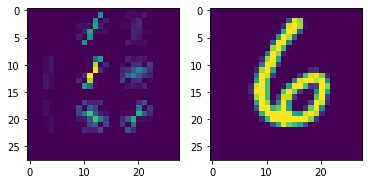

In [101]:
plt.subplot(121)
plt.imshow(hog_images[8911])
plt.subplot(122)
plt.imshow(data[8911])

In [102]:
labels = np.asarray(labels)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(hog_features,labels,test_size=0.2)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(48000, 128), (48000,)
Test data and target sizes: 
(12000, 128), (12000,)


In [108]:
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
classifier = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
classifier.fit(X_scaled, y_train)
test_accuracy = classifier.score(scaler.transform(X_test), y_test)
print(test_accuracy)

0.9464166666666667


### Answer 8

In [91]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\MNIST\mnist_train.csv",nrows=1000)

In [92]:
from sklearn.model_selection import train_test_split

In [102]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state = 42)

In [103]:
y = df['label'].values
x = df.drop(['label'], axis=1).values

In [105]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(800, 784)
(800,)
(200, 784)
(200,)


In [88]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
model = VGG16()
plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [109]:
IMG_SIZE = 32
def resize(img_array):
    tmp = np.empty((img_array.shape[0], IMG_SIZE, IMG_SIZE))

    for i in range(len(img_array)):
        img = img_array[i].reshape(28, 28).astype('uint8')
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img.astype('float32')/255
        tmp[i] = img
        
    return tmp
train_x_resize = resize(train_x)
test_x_resize = resize(test_x)

In [111]:
train_x_final = np.stack((train_x_resize,)*3, axis=-1)
test_x_final = np.stack((test_x_resize,)*3, axis=-1)
print(train_x_final.shape)
print(test_x_final.shape)

(800, 32, 32, 3)
(200, 32, 32, 3)


In [114]:
from tensorflow.keras.utils import to_categorical
train_y_final = to_categorical(train_y, num_classes=10)
print(train_y_final.shape)

(800, 10)


In [116]:
from keras.models import Sequential
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Flatten

vgg19 = VGG19(weights = 'imagenet', 
              include_top = False,
              input_shape=(IMG_SIZE, IMG_SIZE, 3)
              )

model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

model.summary()

80150528/80134624 [==============================] - 14s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 20,029,514
Trainable params: 20,029,514
Non-trainable params: 0
_________________________________________________________________


In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x_final, train_y_final, test_size=0.2, random_state=2019)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 32, 32, 3)
(160, 32, 32, 3)
(640, 10)
(160, 10)


In [123]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)
mc = ModelCheckpoint(filepath='mnist-vgg19.h5', verbose=1, monitor='val_accuracy')
cb = [es, mc]

In [124]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_data=(x_test, y_test),
                    callbacks=cb)

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 0.2173 - accuracy: 0.9453
Epoch 00001: saving model to mnist-vgg19.h5
5/5 [==============================] - 40s 8s/step - loss: 0.2173 - accuracy: 0.9453 - val_loss: 0.2393 - val_accuracy: 0.9250
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 0.0554 - accuracy: 0.9875
Epoch 00002: saving model to mnist-vgg19.h5
5/5 [==============================] - 40s 8s/step - loss: 0.0554 - accuracy: 0.9875 - val_loss: 0.2089 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.9937
Epoch 00003: saving model to mnist-vgg19.h5
5/5 [==============================] - 43s 9s/step - loss: 0.0328 - accuracy: 0.9937 - val_loss: 0.2066 - val_accuracy: 0.9250
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.9969
Epoch 00004: saving model to mnist-vgg19.h5
5/5 [==============================] - 41s 8s/step - loss: 0.0232 - accurac

#### We can see that the accuracy improved on using a pre trained cnn model vgg19 in place of the knn model implemented on hog features.

### Answer 3 - Part 2

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import cv2
import glob

from tqdm.notebook import tqdm_notebook as tqdm
import seaborn as sns
from keras.applications.vgg16 import VGG16
import os

In [3]:
size = 256

In [4]:
# Storing training data and labels into lists
train_images = []
train_labels = [] 

In [5]:
for directory_path in glob.glob(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake"):
    label = "fake"
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (size, size))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

fake
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_100_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_101_0010.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_102_0101.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_103_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_104_1000.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_105_1100.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_106_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_107_1011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_108_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_109_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_10_0001.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_110_0001.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_1_1110.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_200_1110.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_201_0001.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_202_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_203_0111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_204_0101.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_205_1110.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_206_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_207_1000.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_208_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_209_0001.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_20_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_7_1100.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_80_0001.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_81_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_82_0001.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_83_1110.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_84_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_85_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_86_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_87_0110.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_88_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_89_0010.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_8_0010.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\easy_

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_190_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_191_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_192_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_193_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_194_0110.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_195_1000.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_196_1101.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_197_1100.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_198_1100.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_199_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_19_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_1_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_74_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_75_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_76_1100.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_77_1100.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_78_1101.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_79_1110.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_7_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_80_0100.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_81_1101.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_82_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_83_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard_84_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\hard

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_185_1110.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_186_1100.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_187_1101.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_188_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_189_0011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_18_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_190_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_191_0111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_192_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_193_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_194_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_195_1111.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\fake\mid_

In [6]:
for directory_path in glob.glob(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real"):
    label = "real"
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (size, size))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

real
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00001.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00002.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00003.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00004.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00005.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00006.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00007.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00008.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00009.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00010.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00011.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00012.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00013.jpg
C:\User

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00120.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00121.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00122.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00123.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00124.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00125.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00126.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00127.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00128.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00129.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00130.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00131.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00132.jpg
C:\Users\Anu

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00232.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00233.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00234.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00235.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00236.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00237.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00238.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00239.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00240.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00241.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00242.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00243.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00244.jpg
C:\Users\Anu

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00341.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00342.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00343.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00344.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00345.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00346.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00347.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00348.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00349.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00350.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00351.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00352.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00353.jpg
C:\Users\Anu

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00458.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00459.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00460.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00461.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00462.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00463.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00464.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00465.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00466.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00467.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00468.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00469.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00470.jpg
C:\Users\Anu

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00569.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00570.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00571.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00572.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00573.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00574.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00575.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00576.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00577.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00578.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00579.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00580.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00581.jpg
C:\Users\Anu

C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00684.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00685.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00686.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00687.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00688.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00689.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00690.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00691.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00692.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00693.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00694.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00695.jpg
C:\Users\Anuradha Mahato\Documents\CV_Asg2\train3\train\real\real_00696.jpg
C:\Users\Anu

In [7]:
test_images = []
test_labels = [] 
for directory_path in glob.glob(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\validation3\validation\fake"):
    val_label = "fake"
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (size,size))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(val_label)

In [8]:
for directory_path in glob.glob(r"C:\Users\Anuradha Mahato\Documents\CV_Asg2\validation3\validation\real"):
    val_label = "real"
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (size,size))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(val_label)

In [9]:
#Converting lists to arrays                
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [10]:
#Encode labels from text to integers.
from sklearn import preprocessing
label_en = preprocessing.LabelEncoder()
label_en.fit(test_labels)
test_labels_encoded = label_en.transform(test_labels)
label_en.fit(train_labels)
train_labels_encoded = label_en.transform(train_labels)

In [11]:
#Split data into test and train datasets (renaming)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [12]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [13]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(size, size, 3))

# Making loaded layers as non-trainable as we want to work with pre-trained weights
for layer in VGG_model.layers:
    layer.trainable = False

In [14]:
VGG_model.summary()  

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [15]:
# Extracting features from convolutional network
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [16]:
X = features

In [17]:
df = pd.DataFrame(X)
df.to_csv("X_CNN_Features.csv")

In [18]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from collections import Counter
from sklearn import svm 
from sklearn.metrics import classification_report
import pylab as p

In [19]:
clf1 = svm.SVC(class_weight='balanced',kernel='linear',C=1,probability=True)
clf2 = svm.SVC(class_weight='balanced',kernel='rbf',C=1,probability=True)
clf3 = svm.SVC(class_weight='balanced',kernel='poly',C=1,probability=True)
clf4 = svm.SVC(class_weight='balanced',kernel='sigmoid',C=1,probability=True)

In [20]:
clf2.fit(X,y_train)

SVC(C=1, class_weight='balanced', probability=True)

In [21]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [23]:
prediction = clf2.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = label_en.inverse_transform(prediction)

In [25]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

Accuracy =  0.6786296900489397


[[197  91]
 [106 219]]


<AxesSubplot:>

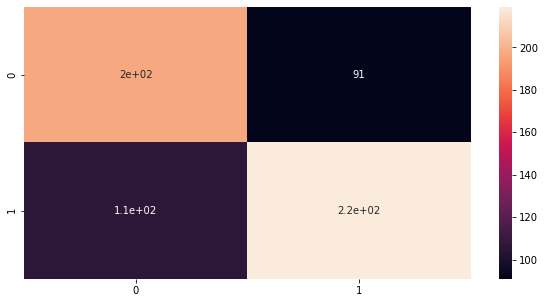

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction)
print(cm)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['real']
The actual label for this image is:  real


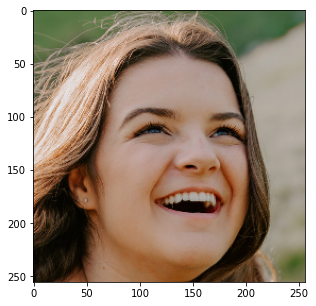

In [33]:
# Checking result on few images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.figure(figsize=(10,5))
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = clf2.predict(input_img_features)[0] 
prediction = label_en.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['real']
The actual label for this image is:  real


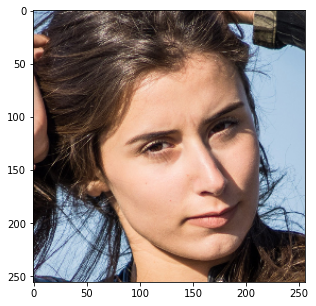

In [35]:
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.figure(figsize=(10,5))
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = clf2.predict(input_img_features)[0] 
prediction = label_en.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['fake']
The actual label for this image is:  fake


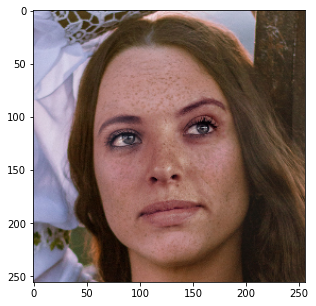

In [36]:
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.figure(figsize=(10,5))
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = clf2.predict(input_img_features)[0] 
prediction = label_en.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

### Answer 4 - Part 2

#### Implementing LK feature tracking - sparse flow

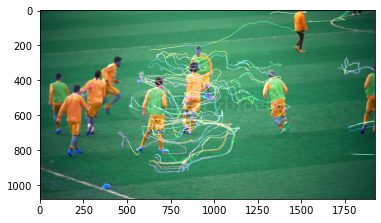

In [7]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture('football_Trim1.mp4')
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Creating some random colors
color = np.random.randint(0, 255, (100, 3))
# Taking first frame and finding corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Creating a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculating optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Selecting good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # drawing the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    img = cv.add(frame, mask)
    plt.imshow( img)
 
    # Now updating the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

#### Optic flow - dense flow

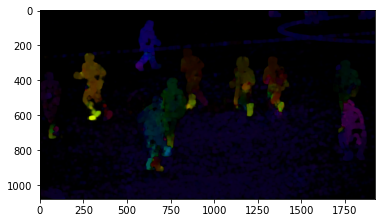

In [78]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(cv.samples.findFile("football_Trim.mp4"))
ret, frame1 = cap.read()
prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
while(1):
    ret, frame2 = cap.read()
    next = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    plt.imshow(bgr)
    break